#Bibliotecas

Importando todas as bibliotecas necessárias:

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

#Download e correções no arquivo CSV

Fazendo o download do arquivo CSV diretamente do Kaggle:

In [2]:
# Download do dataset
path = kagglehub.dataset_download("jacopoferretti/superstore-dataset")

print("Path to dataset files:", path)

100%|██████████| 550k/550k [00:00<00:00, 23.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jacopoferretti/superstore-dataset/versions/1


Verificando o nome do arquivo CSV:

In [3]:
# Caminho retornado pelo kagglehub
path = '/root/.cache/kagglehub/datasets/jacopoferretti/superstore-dataset/versions/1'

# Listar arquivos no diretório
files = os.listdir(path)
print("Arquivos no diretório:", files)

Arquivos no diretório: ['Sample - Superstore.csv']


Renomeando o arquivo CSV para "superstore.csv":

In [4]:
# Caminho completo do arquivo original
old_name = os.path.join(path, 'Sample - Superstore.csv')

# Caminho completo do novo nome
new_name = os.path.join(path, 'superstore.csv')

# Renomear o arquivo
os.rename(old_name, new_name)

# Verificar se o arquivo foi renomeado
print("Arquivos no diretório após renomeação:", os.listdir(path))

Arquivos no diretório após renomeação: ['superstore.csv']


#Verificação do Dataset

Carregando o arquivo CSV:

In [5]:
import pandas as pd

# Caminho completo para o arquivo CSV renomeado
csv_path = os.path.join(path, 'superstore.csv')

# Carregar o dataset
df = pd.read_csv(csv_path, encoding='latin1')

Verificando os dados:

In [6]:
# Visualizar as primeiras linhas
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [7]:
# Verificar informações do dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
# Verificar valores nulos
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


#Tratamento dos Dados

##Verificar e Limpar os Dados

In [9]:
# Verificar valores nulos
print(df.isnull().sum())

# Removendo valores nulos (se houver)
df = df.dropna()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [10]:
# Verificar duplicatas
print(df.duplicated().sum())

# Remover duplicatas (se houver)
df = df.drop_duplicates()

0


##Variáveis de tempo

In [11]:
# Converter colunas de data
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [12]:
# Criar novas variáveis de tempo
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day of Week'] = df['Order Date'].dt.day_name()

##Novas variáveis

In [13]:
# Tempo de entrega
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

In [14]:
# Margem de lucro
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

##Codificar variáveis categóricas



In [15]:
# Verificar colunas categóricas
print(df.select_dtypes(include=['object']).columns)

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Order Day of Week'],
      dtype='object')


In [16]:
# Aplicar one-hot encoding nas colunas selecionadas
df_encoded = pd.get_dummies(df, columns=['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category', 'Order Day of Week'])

# Verificar o resultado
print(df_encoded.head())

   Row ID        Order ID Order Date  Ship Date Customer ID    Customer Name  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    CG-12520      Claire Gute   
1       2  CA-2016-152156 2016-11-08 2016-11-11    CG-12520      Claire Gute   
2       3  CA-2016-138688 2016-06-12 2016-06-16    DV-13045  Darrin Van Huff   
3       4  US-2015-108966 2015-10-11 2015-10-18    SO-20335   Sean O'Donnell   
4       5  US-2015-108966 2015-10-11 2015-10-18    SO-20335   Sean O'Donnell   

         Country             City       State  Postal Code  ...  \
0  United States        Henderson    Kentucky        42420  ...   
1  United States        Henderson    Kentucky        42420  ...   
2  United States      Los Angeles  California        90036  ...   
3  United States  Fort Lauderdale     Florida        33311  ...   
4  United States  Fort Lauderdale     Florida        33311  ...   

  Sub-Category_Storage Sub-Category_Supplies  Sub-Category_Tables  \
0                False                 False   

## Verificar e corrigir os tipos de dados

In [17]:
# Verificar tipos de dados
print(df.dtypes)

Row ID                        int64
Order ID                     object
Order Date           datetime64[ns]
Ship Date            datetime64[ns]
Ship Mode                    object
Customer ID                  object
Customer Name                object
Segment                      object
Country                      object
City                         object
State                        object
Postal Code                   int64
Region                       object
Product ID                   object
Category                     object
Sub-Category                 object
Product Name                 object
Sales                       float64
Quantity                      int64
Discount                    float64
Profit                      float64
Order Month                   int32
Order Year                    int32
Order Day of Week            object
Delivery Time                 int64
Profit Margin               float64
dtype: object


In [18]:
# Converter colunas
df['Postal Code'] = df['Postal Code'].astype('object')
df['Order Month'] = df['Order Month'].astype('category')
df['Order Year'] = df['Order Year'].astype('category')

# Definir a ordem dos dias da semana
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Order Day of Week'] = pd.Categorical(df['Order Day of Week'], categories=weekday_order, ordered=True)

# Converter colunas categóricas
categorical_columns = ['Ship Mode', 'Segment', 'Category', 'Sub-Category', 'Region']
df[categorical_columns] = df[categorical_columns].astype('category')

# Verificar tipos de dados após ajustes
print(df.dtypes)

Row ID                        int64
Order ID                     object
Order Date           datetime64[ns]
Ship Date            datetime64[ns]
Ship Mode                  category
Customer ID                  object
Customer Name                object
Segment                    category
Country                      object
City                         object
State                        object
Postal Code                  object
Region                     category
Product ID                   object
Category                   category
Sub-Category               category
Product Name                 object
Sales                       float64
Quantity                      int64
Discount                    float64
Profit                      float64
Order Month                category
Order Year                 category
Order Day of Week          category
Delivery Time                 int64
Profit Margin               float64
dtype: object


## Salvar e carregar dados tratados

In [19]:
# Salvar o dataset tratado
df.to_csv('superstore_tratado.csv', index=False)

In [20]:
# Carregar o dataset tratado
df = pd.read_csv('superstore_tratado.csv')

# Verificar as primeiras linhas
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688  2016-06-12  2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

                                        Product Name     Sales Quantity  \
0                

#Análise exploratória inicial (EDA)

##Estatísticas descritivas

In [21]:
# Estatísticas descritivas para colunas numéricas
print(df[['Sales', 'Profit', 'Quantity', 'Discount', 'Delivery Time', 'Profit Margin']].describe())

              Sales       Profit     Quantity     Discount  Delivery Time  \
count   9994.000000  9994.000000  9994.000000  9994.000000    9994.000000   
mean     229.858001    28.656896     3.789574     0.156203       3.958175   
std      623.245101   234.260108     2.225110     0.206452       1.747567   
min        0.444000 -6599.978000     1.000000     0.000000       0.000000   
25%       17.280000     1.728750     2.000000     0.000000       3.000000   
50%       54.490000     8.666500     3.000000     0.200000       4.000000   
75%      209.940000    29.364000     5.000000     0.200000       5.000000   
max    22638.480000  8399.976000    14.000000     0.800000       7.000000   

       Profit Margin  
count    9994.000000  
mean       12.031393  
std        46.675435  
min      -275.000000  
25%         7.500000  
50%        27.000000  
75%        36.250000  
max        50.000000  


In [22]:
# Contagem de valores únicos para colunas categóricas
print(df['Category'].value_counts())
print(df['Region'].value_counts())
print(df['Segment'].value_counts())

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64
Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


##Visualizações básicas

Histograma de vendas

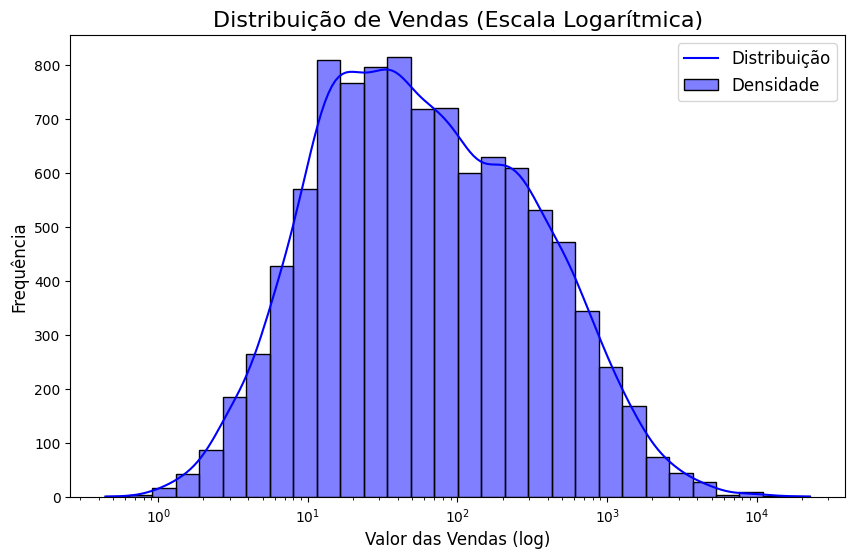

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True, color='blue', edgecolor='black', log_scale=True)
plt.title('Distribuição de Vendas (Escala Logarítmica)', fontsize=16)
plt.xlabel('Valor das Vendas (log)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend(['Distribuição', 'Densidade'], fontsize=12)
plt.show()

Insight:

1. Distribuição das vendas:

  * A maioria das vendas está concentrada na faixa de 10¹ a 10²(ou seja, entre 10 e 100 unidades monetárias).

  * Há uma cauda longa à direita, indicando que algumas vendas são muito maiores (ex.: 10³ e 10⁴ , ou seja, 1.000 a 10.000 unidades monetárias). Esses valores podem representar vendas excepcionais ou outliers.

2. Distribuição assimétrica:

  * A distribuição é assimétrica à direita, o que é comum em dados de vendas. Isso indica que, embora a maioria das transações seja de valor baixo, há um número significativo de transações de alto valor que contribuem para o faturamento total.

3. Relevância para o negócio:

  * A concentração de vendas na faixa de 10 a 100 unidades monetárias sugere que a loja tem uma base sólida de transações de menor valor, possivelmente de clientes individuais ou pequenas empresas.

  * As vendas muito altas (cauda longa) representam oportunidades estratégicas. Essas transações podem ser de clientes corporativos ou compras em grande volume, que devem ser priorizadas com estratégias de fidelização e atendimento personalizado.


Boxplot de lucro por categoria

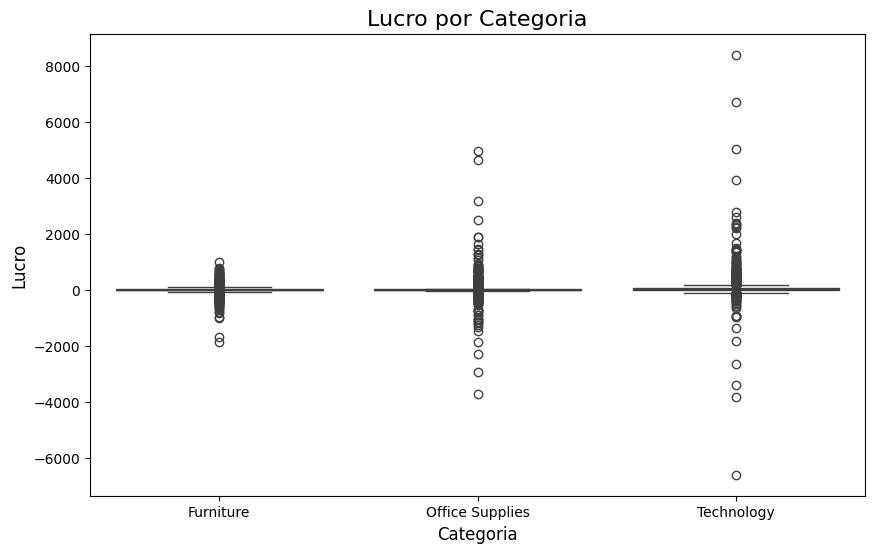

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Lucro por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Lucro', fontsize=12)
plt.show()

Insights:
1. Lucro por categoria:

  * A categoria **Technology** tem o maior lucro médio, seguida por **Furniture** e **Office Supplies**.

  * A categoria **Office Supplies** apresenta alguns valores negativos de lucro, o que pode indicar problemas de precificação ou custos elevados.

2. Variação do lucro:

  * A categoria **Technology** tem a maior variação de lucro, com alguns valores muito altos e outros relativamente baixos.

  * A categoria **Furniture** tem uma distribuição mais equilibrada, mas ainda com alguns valores negativos.

3. Relevância para o negócio:

  * A loja pode focar em estratégias para aumentar o lucro nas categorias **Furniture** e **Office Supplies**, como ajustes de preços ou redução de custos.

  * A categoria **Technology** deve ser mantida como prioridade, dada sua alta lucratividade.

Matriz de correlação

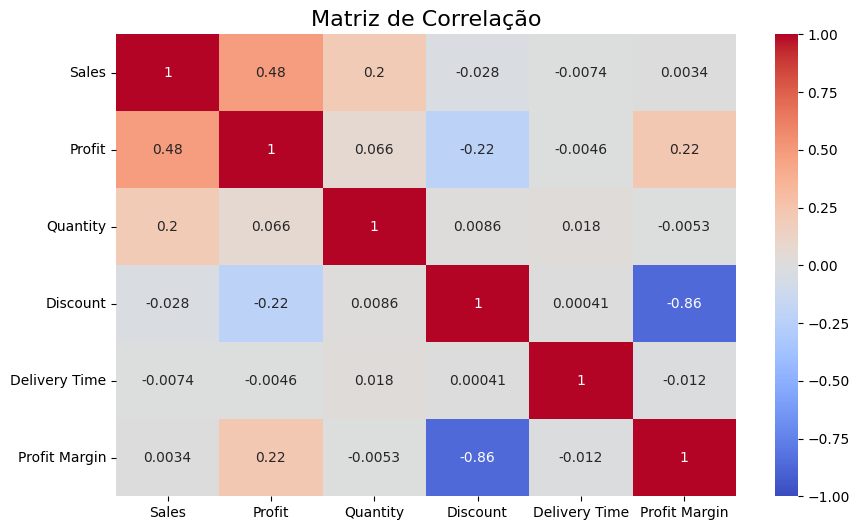

In [25]:
corr_matrix = df[['Sales', 'Profit', 'Quantity', 'Discount', 'Delivery Time', 'Profit Margin']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

Insights:
1. Correlações fortes:

  * **Sales** e **Profit** têm uma correlação positiva moderada (0.48), indicando que vendas mais altas tendem a gerar mais lucro.

  * **Discount** e **Profit Margin** têm uma correlação negativa forte (-0.86), sugerindo que descontos maiores reduzem significativamente a margem de lucro.

2. Correlações fracas:

  * **Quantity** tem uma correlação positiva fraca com **Sales** (0.2), indicando que a quantidade vendida tem um impacto limitado no valor total das vendas.

  * **Delivery Time** não tem correlação significativa com nenhuma das variáveis analisadas.

3. Relevância para o negócio:

  * A loja deve evitar descontos excessivos, pois eles impactam negativamente a margem de lucro.

  * Estratégias para aumentar a quantidade vendida podem ter um impacto limitado no valor total das vendas, mas podem ser úteis para aumentar a base de clientes.

In [26]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_products)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


#Previsão de vendas

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

## Preparação dos dados

In [28]:
# Codificar variáveis categóricas
df_encoded = pd.get_dummies(df, columns=['Category', 'Region', 'Segment'])

# Selecionar variáveis independentes e dependente
X = df_encoded.drop(['Sales', 'Order Date', 'Ship Date', 'Customer Name', 'Product Name'], axis=1)
y = df_encoded['Sales']

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converter todas as colunas para numéricas (se necessário)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Preencher valores nulos (ex.: com 0 ou média)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [29]:
print(X_train.head())
print(y_train.head())

      Row ID  Order ID  Ship Mode  Customer ID  Country  City  State  \
4100    4101       0.0        0.0          0.0      0.0   0.0    0.0   
2586    2587       0.0        0.0          0.0      0.0   0.0    0.0   
9194    9195       0.0        0.0          0.0      0.0   0.0    0.0   
2002    2003       0.0        0.0          0.0      0.0   0.0    0.0   
7225    7226       0.0        0.0          0.0      0.0   0.0    0.0   

      Postal Code  Product ID  Sub-Category  ...  Category_Furniture  \
4100        77095         0.0           0.0  ...               False   
2586        10024         0.0           0.0  ...               False   
9194        85323         0.0           0.0  ...               False   
2002        40214         0.0           0.0  ...               False   
7225        94122         0.0           0.0  ...                True   

      Category_Office Supplies  Category_Technology  Region_Central  \
4100                      True                False            

## Escolhendo o algorítmo de regressão

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Normalizar os dados para SVR e KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Atualizar a lista de algoritmos com pipelines
algorithms = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('Support Vector Regression', make_pipeline(StandardScaler(), SVR())),
    ('K-Nearest Neighbors', make_pipeline(StandardScaler(), KNeighborsRegressor())),
    ('Multi-Layer Perceptron', MLPRegressor(random_state=42, max_iter=1000)),
    ('XGBoost', XGBRegressor(random_state=42))
]

# Dicionário para armazenar os resultados
results = {}

# Testar cada algoritmo
for name, model in algorithms:
    # Treinar o modelo
    if 'Support Vector Regression' in name or 'K-Nearest Neighbors' in name:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calcular métricas no conjunto de teste
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Validação cruzada no conjunto de treino
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_r2_mean = cv_scores.mean()
    cv_r2_std = cv_scores.std()

    # Armazenar resultados
    results[name] = {
        'MSE': mse,
        'R²': r2,
        'CV R² (Mean)': cv_r2_mean,
        'CV R² (Std)': cv_r2_std
    }

    # Exibir resultados
    print(f'{name}:')
    print(f'  MSE: {mse:.2f}')
    print(f'  R²: {r2:.2f}')
    print(f'  CV R² (Mean): {cv_r2_mean:.2f}')
    print(f'  CV R² (Std): {cv_r2_std:.2f}')
    print('-' * 40)

Linear Regression:
  MSE: 654557.12
  R²: -0.11
  CV R² (Mean): 0.38
  CV R² (Std): 0.31
----------------------------------------
Decision Tree:
  MSE: 309183.57
  R²: 0.48
  CV R² (Mean): 0.87
  CV R² (Std): 0.06
----------------------------------------
Random Forest:
  MSE: 212284.78
  R²: 0.64
  CV R² (Mean): 0.92
  CV R² (Std): 0.05
----------------------------------------
Gradient Boosting:
  MSE: 150153.71
  R²: 0.75
  CV R² (Mean): 0.94
  CV R² (Std): 0.04
----------------------------------------
Support Vector Regression:
  MSE: 606905.16
  R²: -0.03
  CV R² (Mean): -0.04
  CV R² (Std): 0.00
----------------------------------------
K-Nearest Neighbors:
  MSE: 352475.61
  R²: 0.40
  CV R² (Mean): 0.57
  CV R² (Std): 0.11
----------------------------------------
Multi-Layer Perceptron:
  MSE: 317810.48
  R²: 0.46
  CV R² (Mean): 0.72
  CV R² (Std): 0.09
----------------------------------------
XGBoost:
  MSE: 261422.46
  R²: 0.56
  CV R² (Mean): 0.74
  CV R² (Std): 0.09
---------

Com os resultados apresentados, o Gradiente Boosting é o melhor algorítmo para trabalharmos.

In [31]:
# Criar o modelo Gradient Boosting com parâmetros padrão
gb_model = GradientBoostingRegressor(random_state=42)

# Treinar o modelo
gb_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = gb_model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R²: {r2:.2f}')

MSE: 150153.71
R²: 0.75


In [32]:
# Obter importância das features
feature_importance = gb_model.feature_importances_
feature_names = X_train.columns

# Criar um DataFrame para visualização
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir as features mais importantes
print(importance_df)

                     Feature    Importance
12                    Profit  8.449649e-01
17             Profit Margin  1.293799e-01
11                  Discount  8.825888e-03
19  Category_Office Supplies  5.791383e-03
10                  Quantity  2.204089e-03
20       Category_Technology  2.093603e-03
16             Delivery Time  1.853867e-03
26         Segment_Corporate  1.407268e-03
0                     Row ID  1.210194e-03
7                Postal Code  8.160190e-04
18        Category_Furniture  7.266936e-04
25          Segment_Consumer  4.372819e-04
13               Order Month  2.320492e-04
21            Region_Central  5.645513e-05
14                Order Year  4.290458e-07
15         Order Day of Week  0.000000e+00
1                   Order ID  0.000000e+00
9               Sub-Category  0.000000e+00
8                 Product ID  0.000000e+00
6                      State  0.000000e+00
5                       City  0.000000e+00
4                    Country  0.000000e+00
22         

In [33]:
# Lista de features com importância zero
features_to_drop = importance_df[importance_df['Importance'] == 0]['Feature'].tolist()

# Remover features do conjunto de treino e teste
X_train_refined = X_train.drop(features_to_drop, axis=1)
X_test_refined = X_test.drop(features_to_drop, axis=1)

# Treinar o modelo refinado
gb_model_refined = GradientBoostingRegressor(random_state=42)
gb_model_refined.fit(X_train_refined, y_train)

# Fazer previsões
y_pred_refined = gb_model_refined.predict(X_test_refined)

# Avaliar o modelo refinado
mse_refined = mean_squared_error(y_test, y_pred_refined)
r2_refined = r2_score(y_test, y_pred_refined)

print(f'MSE (Refinado): {mse_refined:.2f}')
print(f'R² (Refinado): {r2_refined:.2f}')

MSE (Refinado): 151312.73
R² (Refinado): 0.74


## Fazendo previsões

In [34]:
# Fazer previsões
y_pred_new = gb_model_refined.predict(X_test_refined)

# Exibir as previsões
print("Previsões de Vendas:", y_pred_new[:10])  # Mostrar as 10 primeiras previsões

Previsões de Vendas: [483.21235475  21.37799819  69.3488747  221.31872498 245.7040621
 119.43008986 313.95486396   6.32920695   0.94898444  74.24071306]


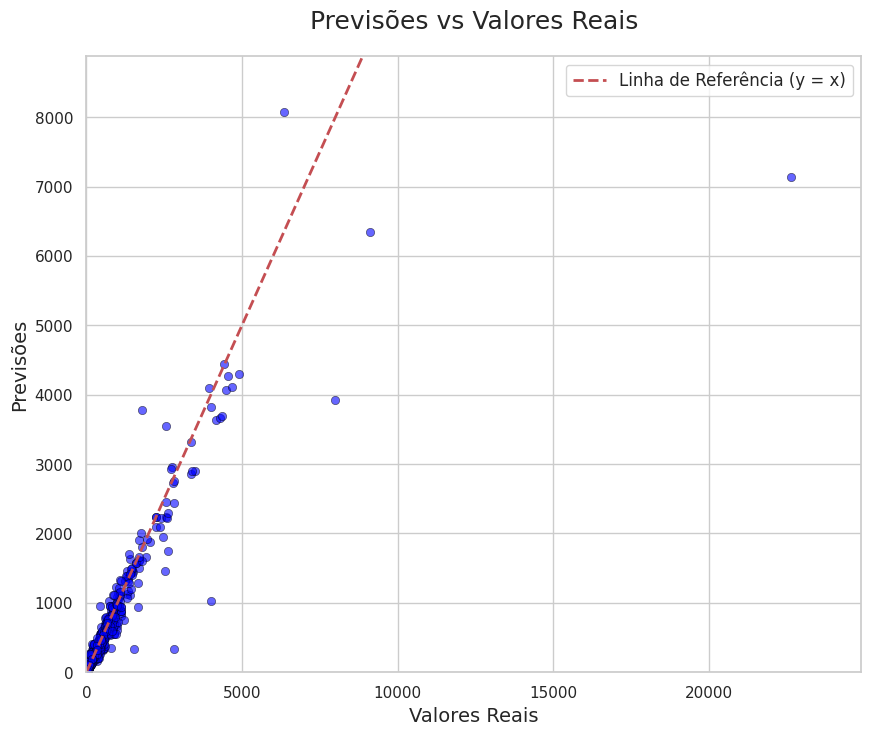

In [35]:
# Configurações do gráfico
plt.figure(figsize=(10, 8))  # Tamanho do gráfico
sns.set(style="whitegrid")  # Estilo do gráfico

# Gráfico de dispersão (scatter plot)
sns.scatterplot(x=y_test, y=y_pred_new, alpha=0.6, color='blue', edgecolor='black')

# Linha de referência (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Linha de Referência (y = x)')

# Títulos e rótulos
plt.title('Previsões vs Valores Reais', fontsize=18, pad=20)
plt.xlabel('Valores Reais', fontsize=14)
plt.ylabel('Previsões', fontsize=14)

# Ajustar limites dos eixos
plt.xlim(0, y_test.max() * 1.1)  # Limite do eixo X
plt.ylim(0, y_pred_new.max() * 1.1)  # Limite do eixo Y

# Adicionar legenda
plt.legend(fontsize=12)

# Mostrar o gráfico
plt.show()